In [ ]:
from os.path import split
from random import random
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from ultralytics import YOLO
import yaml
from PIL import Image
import zipfile

: 

In [4]:
print(f"Cuda available: {torch.cuda.is_available()}")
print(f"cuda device count: {torch.cuda.device_count()}")
print(f"cuda device name: {torch.cuda.get_device_name(torch.cuda.current_device())}")
print(f"current cuda device:{torch.cuda.current_device()}")

Cuda available: True
cuda device count: 1
cuda device name: NVIDIA GeForce RTX 4060
current cuda device:0


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [6]:
yaml_path = 'F:/Deep learning/pytorch/Dental OPG Image dataset/Object detection/config.yaml'

with open(yaml_path,'r') as m:
  print(m.read())

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 4
names: ['Cavities', 'Damage', 'Infection', 'Wisdom']

roboflow:
  workspace: dental-disease-detection-hpn1d
  project: demo-wjml3
  version: 8
  license: CC BY 4.0
  url: https://universe.roboflow.com/dental-disease-detection-hpn1d/demo-wjml3/dataset/8


In [7]:
print(device)

cuda


In [8]:
print(os.path.exists("F:/Deep learning/dental_yolo/yolo11l.pt"))

True


In [7]:
from ultralytics import YOLO

model = YOLO("F:/Deep learning/dental_yolo/runs/detect/dental_dutta/weights/epoch60.pt")

model.train(
    data= yaml_path,
    epochs=100,
    imgsz=224,
    batch= 16,
    name='dental_dutta',
    save_period=10,
    save=True,
    verbose=True,
    resume = True,
    device = device
    
)

New https://pypi.org/project/ultralytics/8.3.158 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.141  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=F:/Deep learning/pytorch/Dental OPG Image dataset/Object detection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=F:\Deep learning\dental_yolo\runs\detect\dental_dutta\weig

train: Scanning F:\Deep learning\pytorch\Dental OPG Image dataset\Object detection\train\labels.cache... 7985 images, 1

WARNING Box and segment counts should be equal, but got len(segments) = 3831, len(boxes) = 18915. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access  (ping: 8.912.4 ms, read: 4.73.3 MB/s, size: 36.6 KB)


val: Scanning F:\Deep learning\pytorch\Dental OPG Image dataset\Object detection\valid\labels.cache... 1402 images, 33 

WARNING Box and segment counts should be equal, but got len(segments) = 759, len(boxes) = 3837. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\dental_dutta\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Resuming training F:\Deep learning\dental_yolo\runs\detect\dental_dutta\weights\epoch60.pt from epoch 62 to 100 total epochs
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs\detect\dental_dutta
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.65G      1.917       1.31      1.061          1        224: 100%|██████████| 500/500 [06:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:30

                   all       1402       3837      0.447      0.483       0.39      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.96G      1.906      1.321      1.057          0        224: 100%|██████████| 500/500 [05:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837      0.451      0.484      0.378      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.96G      1.905      1.316      1.065          5        224: 100%|██████████| 500/500 [04:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837       0.44      0.487      0.383      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.96G      1.891      1.304      1.057          3        224: 100%|██████████| 500/500 [04:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:21

                   all       1402       3837      0.425      0.499      0.385      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.96G      1.894      1.327      1.058          1        224: 100%|██████████| 500/500 [03:47<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:20

                   all       1402       3837      0.418      0.507      0.386       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.96G      1.896      1.307      1.057          0        224: 100%|██████████| 500/500 [03:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:22

                   all       1402       3837      0.413      0.523      0.389      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.96G      1.882      1.294      1.055          1        224: 100%|██████████| 500/500 [03:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23


                   all       1402       3837      0.433      0.511      0.389      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.96G      1.881      1.298      1.054          3        224: 100%|██████████| 500/500 [03:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:24

                   all       1402       3837      0.435      0.498      0.395      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.96G      1.872      1.282      1.056          1        224: 100%|██████████| 500/500 [03:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:22

                   all       1402       3837      0.426      0.517      0.397      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.96G      1.881      1.298      1.057          2        224: 100%|██████████| 500/500 [03:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:22

                   all       1402       3837      0.446      0.499      0.389      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.96G      1.869      1.275       1.05          1        224: 100%|██████████| 500/500 [03:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:24

                   all       1402       3837      0.441      0.494      0.384      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.96G      1.872      1.271      1.049          2        224: 100%|██████████| 500/500 [03:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:24


                   all       1402       3837      0.453      0.491      0.384       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.96G       1.87      1.272      1.053         13        224: 100%|██████████| 500/500 [04:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837      0.431      0.514      0.387      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.96G      1.861      1.267      1.051          1        224: 100%|██████████| 500/500 [04:30<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:24

                   all       1402       3837       0.43      0.507      0.384      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.96G      1.854      1.273      1.048          2        224: 100%|██████████| 500/500 [04:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837      0.435        0.5      0.387      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.96G       1.85      1.258      1.052          1        224: 100%|██████████| 500/500 [03:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:25

                   all       1402       3837      0.444      0.494      0.389      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.96G      1.845      1.247      1.041          5        224: 100%|██████████| 500/500 [03:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:22

                   all       1402       3837      0.437      0.508      0.388      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.96G      1.849      1.258      1.041          0        224: 100%|██████████| 500/500 [03:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:21

                   all       1402       3837      0.424      0.499      0.387      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.96G      1.837      1.237      1.039          2        224: 100%|██████████| 500/500 [03:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837      0.439      0.492      0.386      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.96G      1.818      1.226       1.04          9        224: 100%|██████████| 500/500 [03:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:21

                   all       1402       3837      0.449      0.482      0.381      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.96G      1.839       1.24      1.045          2        224: 100%|██████████| 500/500 [03:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837       0.44      0.494      0.385      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.96G      1.817      1.225      1.035          4        224: 100%|██████████| 500/500 [03:53<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:22

                   all       1402       3837      0.437      0.505      0.386      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.96G      1.819      1.219      1.038          5        224: 100%|██████████| 500/500 [03:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837      0.442      0.502       0.39      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.96G       1.81      1.225      1.037          5        224: 100%|██████████| 500/500 [03:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837      0.439      0.497      0.386      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.96G      1.805      1.211      1.033          5        224: 100%|██████████| 500/500 [03:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:20

                   all       1402       3837      0.426      0.512       0.39      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.96G      1.813      1.211      1.031          6        224: 100%|██████████| 500/500 [04:34<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:33

                   all       1402       3837      0.426      0.513      0.388      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.96G      1.801      1.204      1.032          1        224: 100%|██████████| 500/500 [04:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:25

                   all       1402       3837      0.434      0.513      0.389      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.96G      1.809      1.203      1.032          3        224: 100%|██████████| 500/500 [04:48<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837      0.429      0.519      0.389      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.96G       1.79      1.187      1.028          0        224: 100%|██████████| 500/500 [04:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:21

                   all       1402       3837      0.428      0.525      0.394      0.147


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.96G      1.822      1.181       1.07          1        224: 100%|██████████| 500/500 [04:29<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837      0.428      0.536      0.396      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.96G      1.806      1.163      1.065          5        224: 100%|██████████| 500/500 [04:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837      0.421      0.529      0.398      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.96G      1.806      1.155      1.061          1        224: 100%|██████████| 500/500 [04:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:21

                   all       1402       3837      0.425      0.536      0.402       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.96G      1.795       1.15      1.061          9        224: 100%|██████████| 500/500 [04:09<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837      0.422      0.538      0.403      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.96G      1.783       1.14      1.061          1        224: 100%|██████████| 500/500 [04:09<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837      0.421      0.527      0.403      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.96G      1.789      1.139      1.057          1        224: 100%|██████████| 500/500 [04:09<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:26

                   all       1402       3837      0.421      0.521      0.403      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.96G      1.783      1.134      1.056          1        224: 100%|██████████| 500/500 [04:10<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:21

                   all       1402       3837      0.417       0.52        0.4      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.96G      1.775      1.125      1.053          2        224: 100%|██████████| 500/500 [04:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:24

                   all       1402       3837      0.414      0.522      0.404      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.96G      1.761      1.113       1.05          5        224: 100%|██████████| 500/500 [04:12<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:21

                   all       1402       3837      0.415      0.521      0.405      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.96G      1.768      1.117       1.05          7        224: 100%|██████████| 500/500 [04:29<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:23

                   all       1402       3837      0.418      0.519      0.402      0.153



39 epochs completed in 3.156 hours.
Optimizer stripped from runs\detect\dental_dutta\weights\last.pt, 51.2MB
Optimizer stripped from runs\detect\dental_dutta\weights\best.pt, 51.2MB

Validating runs\detect\dental_dutta\weights\best.pt...
Ultralytics 8.3.141  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
YOLO11l summary (fused): 190 layers, 25,282,396 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 44/44 [00:07


                   all       1402       3837      0.415       0.52      0.403      0.152
              Cavities        636       1370      0.549      0.415      0.422      0.152
                Damage        643       1951      0.474      0.603      0.491      0.181
             Infection        353        469      0.389      0.465      0.341      0.118
                Wisdom         33         47      0.249      0.596      0.356      0.157
Speed: 0.0ms preprocess, 1.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\dental_dutta


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001E6B88D1010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

# Now we validate

In [9]:
csv_path = "F:/Deep learning/dental_yolo/runs/detect/dental_dutta/results.csv"
df = pd.read_csv(csv_path)

In [10]:
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,363.875,2.76649,2.85110,1.43715,0.21654,0.28844,0.11864,0.03472,2.87891,2.59412,1.37424,0.003327,0.003327,0.003327
1,2,682.184,2.44521,1.95043,1.23528,0.21447,0.35280,0.15303,0.04763,2.92391,2.46824,1.43775,0.006594,0.006594,0.006594
2,3,994.374,2.54437,1.99543,1.27621,0.20229,0.29211,0.13645,0.04076,2.92399,2.45846,1.36472,0.009795,0.009795,0.009795
3,4,1292.760,2.56934,1.99871,1.28105,0.25562,0.37729,0.18489,0.05714,2.85443,2.45238,1.38070,0.009703,0.009703,0.009703
4,5,1589.940,2.51947,1.95619,1.26532,0.26572,0.36454,0.19528,0.05910,2.84599,2.43846,1.35655,0.009604,0.009604,0.009604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,96,10179.500,1.78852,1.13904,1.05748,0.42135,0.52112,0.40277,0.15191,2.27270,1.65206,1.13006,0.000595,0.000595,0.000595
108,97,10462.100,1.78314,1.13411,1.05593,0.41683,0.51977,0.40047,0.15141,2.27201,1.65388,1.12961,0.000496,0.000496,0.000496
109,98,10747.400,1.77476,1.12487,1.05270,0.41386,0.52241,0.40435,0.15309,2.26977,1.65317,1.12884,0.000397,0.000397,0.000397
110,99,11034.300,1.76086,1.11268,1.04996,0.41454,0.52069,0.40460,0.15331,2.27015,1.65309,1.12906,0.000298,0.000298,0.000298


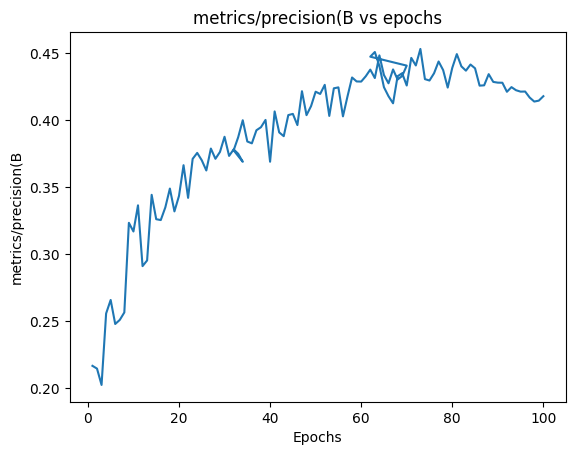

In [14]:
%matplotlib inline
plt.plot(df['epoch'],df['metrics/precision(B)'])
plt.xlabel("Epochs")
plt.ylabel("metrics/precision(B")
plt.title("metrics/precision(B vs epochs")
plt.show()

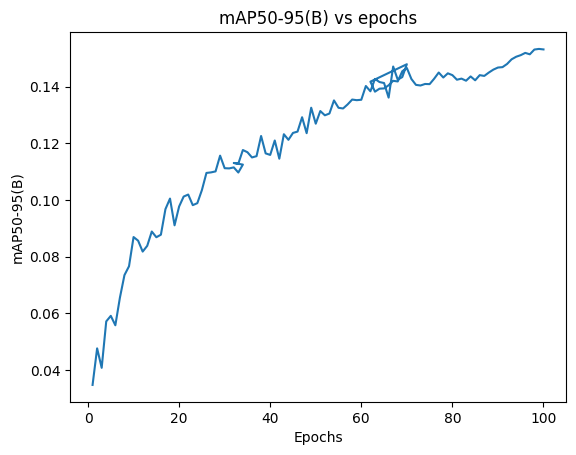

In [15]:
plt.plot(df['epoch'],df['metrics/mAP50-95(B)'])
plt.xlabel("Epochs")
plt.ylabel("mAP50-95(B)")
plt.title("mAP50-95(B) vs epochs")
plt.show()

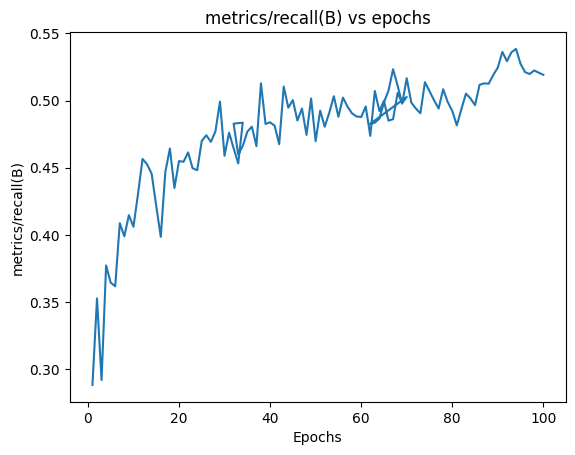

In [16]:

plt.plot(df['epoch'],df['metrics/recall(B)'])
plt.xlabel("Epochs")
plt.ylabel("metrics/recall(B)")
plt.title("metrics/recall(B) vs epochs")
plt.show()

In [9]:
model = YOLO('F:/Deep learning/dental_yolo/runs/detect/dental_dutta/weights/best.pt')
model.save('F:/Deep learning/dental_yolo/yolo_dental1.pth')

In [18]:
results_val = model.val(
    data= yaml_path,
    plots = True,
    imgsz = 224,
    batch = 16,
    split = 'val'
)

Ultralytics 8.3.141  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
YOLO11l summary (fused): 190 layers, 25,282,396 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 3.21.1 MB/s, size: 32.8 KB)


val: Scanning F:\Deep learning\pytorch\Dental OPG Image dataset\Object detection\valid\labels.cache... 1402 images, 33 

WARNING Box and segment counts should be equal, but got len(segments) = 759, len(boxes) = 3837. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07


                   all       1402       3837      0.416      0.522      0.403      0.152
              Cavities        636       1370       0.55      0.417      0.423      0.151
                Damage        643       1951      0.475      0.605      0.491      0.181
             Infection        353        469      0.391      0.469      0.346      0.117
                Wisdom         33         47      0.248      0.596      0.353      0.158
Speed: 0.0ms preprocess, 2.2ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\val


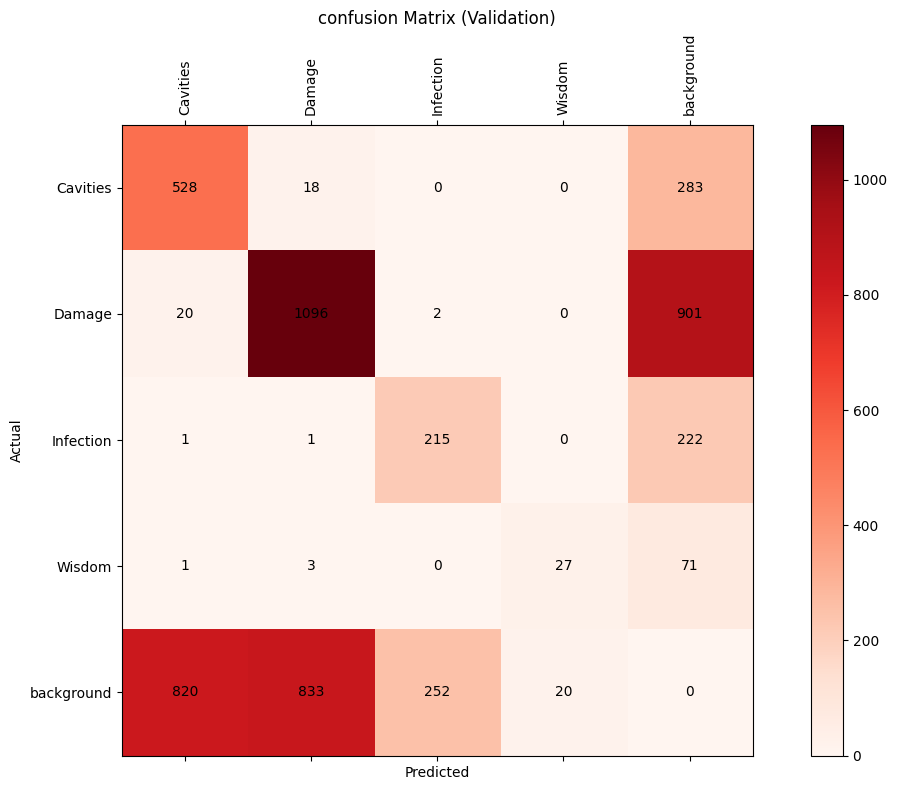

In [29]:
cm = results_val.confusion_matrix.matrix # stored as numpy array

names_list = [model.names[i] for i in sorted(model.names.keys())]
labels = names_list + ["background"]

fig , ax = plt.subplots(figsize=(12,8))
cax = ax.matshow(cm,cmap = "Reds")
fig.colorbar(cax)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i , int(cm[i, j]), ha="center" , va="center")

plt.title("confusion Matrix (Validation)")
plt.tight_layout()
plt.show()

In [36]:
m = results_val.box
precision = m.mp       
recall    = m.mr        
map50     = m.map50       
map0515   = m.map

In [40]:
print(f"Precision (mean):  {precision:.4f}")
print(f"Recall (mean):     {recall:.4f}")
print(f"mAP@0.5:           {map50:.4f}")
print(f"mAP@0.5:0.95:      {map0515:.4f}")

Precision (mean):  0.4159
Recall (mean):     0.5217
mAP@0.5:           0.4033
mAP@0.5:0.95:      0.1519


In [41]:
test_results = model.val(
    data= yaml_path,
    save = True,
    save_txt = True,
    imgsz = 224,
    batch = 16, 
    split = 'test',
    device = device,
)

Ultralytics 8.3.141  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
val: Fast image access  (ping: 9.89.8 ms, read: 16.529.8 MB/s, size: 38.6 KB)


val: Scanning F:\Deep learning\pytorch\Dental OPG Image dataset\Object detection\test\labels.cache... 613 images, 5 bac

WARNING Box and segment counts should be equal, but got len(segments) = 369, len(boxes) = 2002. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:34


                   all        613       2002      0.461      0.479      0.395      0.148
              Cavities        334        760      0.594      0.408      0.439      0.159
                Damage        328       1003      0.542       0.56      0.493      0.174
             Infection        141        209      0.319      0.282      0.215      0.063
                Wisdom         23         30      0.389      0.667      0.433      0.198
Speed: 0.0ms preprocess, 2.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\val2


In [42]:
predict_results = model.predict(
    source = 'F:/Deep Learning/pytorch/Dental OPG Image dataset/Object detection/test/images',
    save = True,
    save_txt = True,
    imgsz = 224,
    batch = 16,
    device = device,
)


image 1/613 F:\Deep Learning\pytorch\Dental OPG Image dataset\Object detection\test\images\Cavities_1028_jpg.rf.502756076425202626fa7a524c898210.jpg: 224x224 1 Damage, 3.2ms
image 2/613 F:\Deep Learning\pytorch\Dental OPG Image dataset\Object detection\test\images\Cavities_1033_jpg.rf.e787d4cc4a098a5cb1affa3681018734.jpg: 224x224 2 Cavitiess, 1 Damage, 3.2ms
image 3/613 F:\Deep Learning\pytorch\Dental OPG Image dataset\Object detection\test\images\Cavities_1045_jpg.rf.0a84e1c8ae35a1d3d011b0cff22c12d0.jpg: 224x224 1 Cavities, 2 Damages, 3.2ms
image 4/613 F:\Deep Learning\pytorch\Dental OPG Image dataset\Object detection\test\images\Cavities_1053_jpg.rf.fccbc2c4564fa8bfb63606ea69e26a5a.jpg: 224x224 2 Cavitiess, 1 Infection, 1 Wisdom, 3.2ms
image 5/613 F:\Deep Learning\pytorch\Dental OPG Image dataset\Object detection\test\images\Cavities_1056_jpg.rf.a51370df101bc8837f1e508daabe5aa7.jpg: 224x224 2 Cavitiess, 3.2ms
image 6/613 F:\Deep Learning\pytorch\Dental OPG Image dataset\Object detec

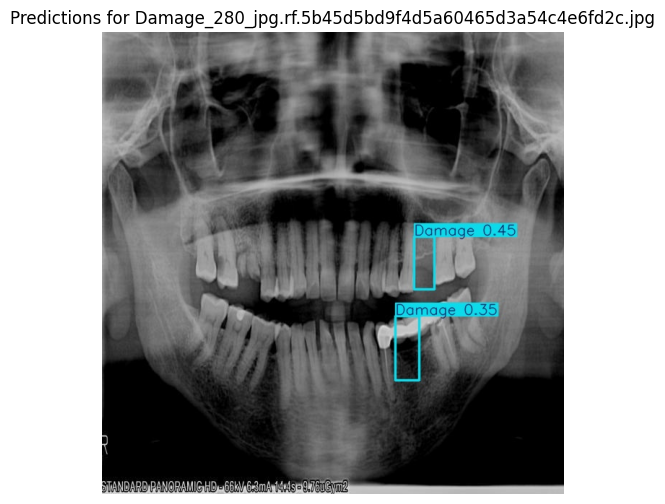

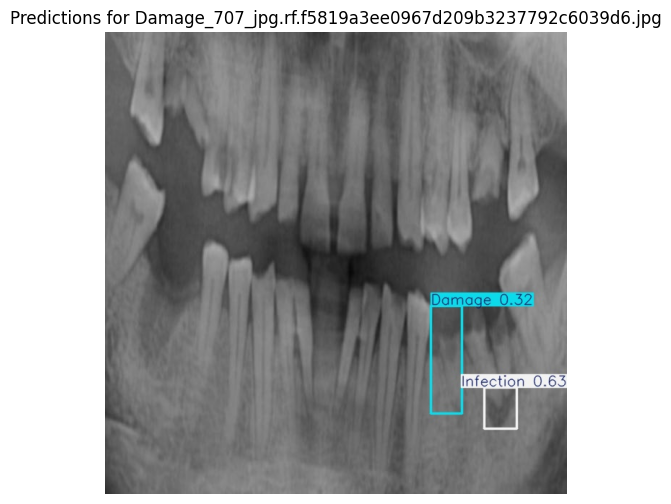

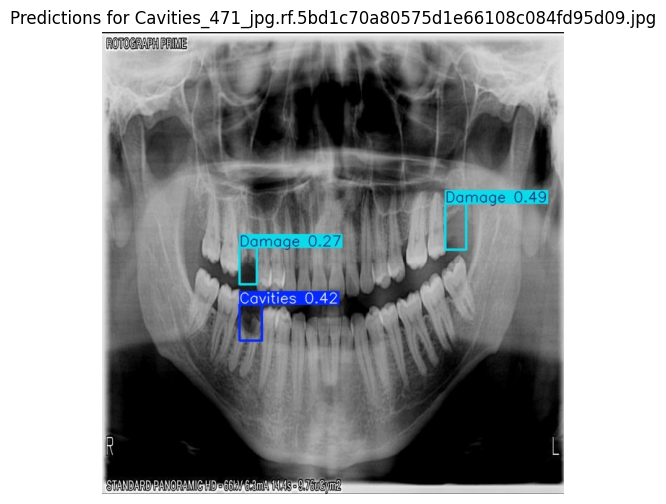

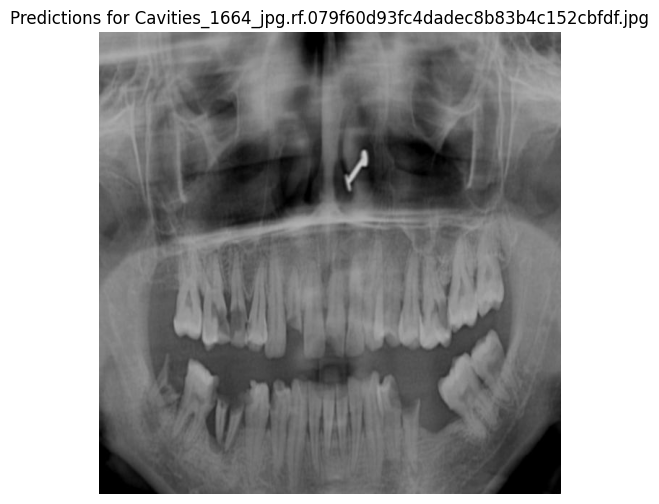

Done displaying random images with predictions.


In [47]:
import random
import cv2
image_dir = 'F:/Deep learning/dental_yolo/runs/detect/predict'
image_files = [ f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.jpeg') ]

no_display = 4
selected_images = random.sample(image_files, min(no_display, len(image_files)))

for image_file in selected_images:
    try:
        # Read the image
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Could not load image {image_path}")
            continue

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image with predictions
        plt.figure(figsize=(8, 6))
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title(f'Predictions for {image_file}')
        plt.show()

    except Exception as e:
        print(f"Error processing {image_file}: {e}")

print("Done displaying random images with predictions.")

In [49]:
for name, res in [("Validation", results_val), ("Test", test_results)]:
    m = res.box
    print(f"{name} set →"
          f"  Precision: {m.mp:.3f},"
          f"  Recall: {m.mr:.3f},"
          f"  mAP@0.5: {m.map50:.3f},"
          f"  mAP@[0.5:0.95]: {m.map:.3f}")


Validation set →  Precision: 0.416,  Recall: 0.522,  mAP@0.5: 0.403,  mAP@[0.5:0.95]: 0.152
Test set →  Precision: 0.461,  Recall: 0.479,  mAP@0.5: 0.395,  mAP@[0.5:0.95]: 0.148


In [51]:
from pathlib import Path
import numpy as np

def load_boxes(txt_path):
    """
    Reads a YOLO .txt label file line-by-line.
    - GT labels: 5 columns [cls, x_center, y_center, width, height]
    - Pred labels: 6 columns [cls, x_center, y_center, width, height, conf]
    Returns a list of (cls, x1, y1, x2, y2, conf_or_None).
    """
    boxes = []
    p = Path(txt_path)
    if not p.exists():
        return boxes

    with p.open() as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 5:
                continue
            cls = int(parts[0])
            x_c, y_c, w, h = map(float, parts[1:5])
            conf = float(parts[5]) if len(parts) >= 6 else None
            # convert center format to corner format
            x1 = x_c - w/2
            x2 = x_c + w/2
            y1 = y_c - h/2
            y2 = y_c + h/2
            boxes.append((cls, x1, y1, x2, y2, conf))
    return boxes

def iou(boxA, boxB):
    xa1, ya1, xa2, ya2 = boxA
    xb1, yb1, xb2, yb2 = boxB
    xi1, yi1 = max(xa1, xb1), max(ya1, yb1)
    xi2, yi2 = min(xa2, xb2), min(ya2, yb2)
    inter = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    union = ((xa2-xa1)*(ya2-ya1) + (xb2-xb1)*(yb2-yb1) - inter)
    return inter/union if union > 0 else 0

# Paths
test_img_dir   = Path("F:/Deep Learning/pytorch/Dental OPG Image dataset/Object detection/test/images")
pred_label_dir = Path("F:/Deep learning/dental_yolo/runs/detect/predict/labels")
gt_label_dir   = Path("F:/Deep learning/pytorch/Dental OPG Image dataset/Object detection/test/labels")

# Evaluation loop
correct, total = 0, 0
for img_path in test_img_dir.glob("*.jpg"):
    total += 1
    stem = img_path.stem
    preds = load_boxes(pred_label_dir / f"{stem}.txt")
    gts   = load_boxes(gt_label_dir   / f"{stem}.txt")

    match = False
    for gt in gts:
        gt_cls, *gt_box, _ = gt
        for pr in preds:
            pr_cls, *pr_box, _ = pr
            if pr_cls == gt_cls and iou(gt_box, pr_box) >= 0.5:
                match = True
                break
        if match:
            break

    if match:
        correct += 1

print(f"Per-image accuracy: {correct}/{total} = {correct/total:.3f}")


Per-image accuracy: 349/613 = 0.569


In [1]:
# Check what's in your label files
import os

def check_label_format(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
    
    for line in lines:
        parts = line.strip().split()
        if len(parts) > 5:  # More than 5 means segmentation data
            print(f"Segmentation format found: {len(parts)} values")
            print(f"Line: {line.strip()}")
        else:
            print(f"Detection format: {len(parts)} values")
        break

# Check a few label files
label_dir = "F:/Deep learning/pytorch/Dental OPG Image dataset/Object detection/train/labels"
label_files = [f for f in os.listdir(label_dir) if f.endswith('.txt')][:5]

for label_file in label_files:
    print(f"\nChecking {label_file}:")
    check_label_format(os.path.join(label_dir, label_file))


Checking Cavities_1000_jpg.rf.c46dfdec3e110481fc2a0cbfdf31130d.txt:
Detection format: 5 values

Checking Cavities_1001_jpg.rf.315dc614671bf86c35492db169485de7.txt:
Detection format: 5 values

Checking Cavities_1002_jpg.rf.e9844011e3f3acfc8f5435bd52b6d71c.txt:
Detection format: 5 values

Checking Cavities_1003_jpg.rf.8eec7b47e629147eb58cac6d1b40c96c.txt:
Detection format: 5 values

Checking Cavities_1004_jpg.rf.aa1defcc01ed8dd7e34db61abc4a4f1b.txt:
Detection format: 5 values


In [10]:
# Test different confidence thresholds
for conf in [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]:
    results = model.val(data=yaml_path, conf=conf, verbose=False)
    print(f"Conf {conf}: Recall = {results.box.r.mean():.3f}")

Ultralytics 8.3.141  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
YOLO11l summary (fused): 190 layers, 25,282,396 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access  (ping: 10.29.7 ms, read: 4.32.6 MB/s, size: 38.7 KB)


val: Scanning F:\Deep learning\pytorch\Dental OPG Image dataset\Object detection\valid\labels.cache... 1402 images, 33 

WARNING Box and segment counts should be equal, but got len(segments) = 759, len(boxes) = 3837. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:32


                   all       1402       3837      0.416      0.522      0.408      0.157
Speed: 0.0ms preprocess, 2.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\val3
Conf 0.01: Recall = 0.522
Ultralytics 8.3.141  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
val: Fast image access  (ping: 0.10.0 ms, read: 4.12.2 MB/s, size: 34.6 KB)


val: Scanning F:\Deep learning\pytorch\Dental OPG Image dataset\Object detection\valid\labels.cache... 1402 images, 33 

WARNING Box and segment counts should be equal, but got len(segments) = 759, len(boxes) = 3837. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:08


                   all       1402       3837      0.416      0.522      0.422      0.171
Speed: 0.0ms preprocess, 2.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\val4
Conf 0.1: Recall = 0.522
Ultralytics 8.3.141  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
val: Fast image access  (ping: 0.10.0 ms, read: 4.42.7 MB/s, size: 33.5 KB)


val: Scanning F:\Deep learning\pytorch\Dental OPG Image dataset\Object detection\valid\labels.cache... 1402 images, 33 

WARNING Box and segment counts should be equal, but got len(segments) = 759, len(boxes) = 3837. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:08


                   all       1402       3837      0.418      0.519      0.423       0.18
Speed: 0.0ms preprocess, 2.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\val5
Conf 0.2: Recall = 0.519
Ultralytics 8.3.141  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
val: Fast image access  (ping: 0.10.0 ms, read: 3.11.8 MB/s, size: 35.6 KB)


val: Scanning F:\Deep learning\pytorch\Dental OPG Image dataset\Object detection\valid\labels.cache... 1402 images, 33 

WARNING Box and segment counts should be equal, but got len(segments) = 759, len(boxes) = 3837. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:07


                   all       1402       3837      0.495      0.431      0.422      0.187
Speed: 0.0ms preprocess, 2.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\val6
Conf 0.3: Recall = 0.431
Ultralytics 8.3.141  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
val: Fast image access  (ping: 0.10.0 ms, read: 21.138.7 MB/s, size: 37.4 KB)


val: Scanning F:\Deep learning\pytorch\Dental OPG Image dataset\Object detection\valid\labels.cache... 1402 images, 33 

WARNING Box and segment counts should be equal, but got len(segments) = 759, len(boxes) = 3837. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:08


                   all       1402       3837       0.57      0.341      0.421      0.194
Speed: 0.0ms preprocess, 2.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\val7
Conf 0.4: Recall = 0.341
Ultralytics 8.3.141  Python-3.11.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
val: Fast image access  (ping: 0.10.0 ms, read: 4.83.6 MB/s, size: 34.2 KB)


val: Scanning F:\Deep learning\pytorch\Dental OPG Image dataset\Object detection\valid\labels.cache... 1402 images, 33 

WARNING Box and segment counts should be equal, but got len(segments) = 759, len(boxes) = 3837. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 88/88 [00:06


                   all       1402       3837      0.624      0.223      0.403      0.194
Speed: 0.0ms preprocess, 2.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\val8
Conf 0.5: Recall = 0.223
